# TCS Stock Analysis Data ML



## Import Required Libraries



In [ ]:
# Basic data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')


# Date handling
from datetime import datetime

# Warnings
import warnings
warnings.filterwarnings('ignore')


## Import and Preview Datasets

In [ ]:
# Load datasets
stock_history = pd.read_csv('TCS_stock_history.csv')
stock_info = pd.read_csv('TCS_stock_info.csv')
stock_action = pd.read_csv('TCS_stock_action.csv')

# Preview datasets
stock_history.head()

# Check structure
print(stock_history.info())
print(stock_history.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB
None
              Open         High          Low        Close        Volume  \
count  4463.000000  4463.000000  4463.000000  4463.000000  4.463000e+03   
mean    866.936239   876.675013   856.653850   866.537398  3.537876e+06   
std     829.905368   838.267104   821.233477   829.611313  3.273531e+06   
min      24.146938    27.102587    24.146938    26.377609  0.000000e+00   
25%     188.951782  

## Data Preprocessing

In [ ]:
# Convert 'Date' to datetime
stock_history['Date'] = pd.to_datetime(stock_history['Date'])

# Sort by date
stock_history.sort_values('Date', inplace=True)

# Check for missing values
print(stock_history.isnull().sum())

# Fill or drop missing values if any
stock_history.fillna(method='ffill', inplace=True)


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


## Exploratory Data Analysis (EDA)

### 1. Price Over Time

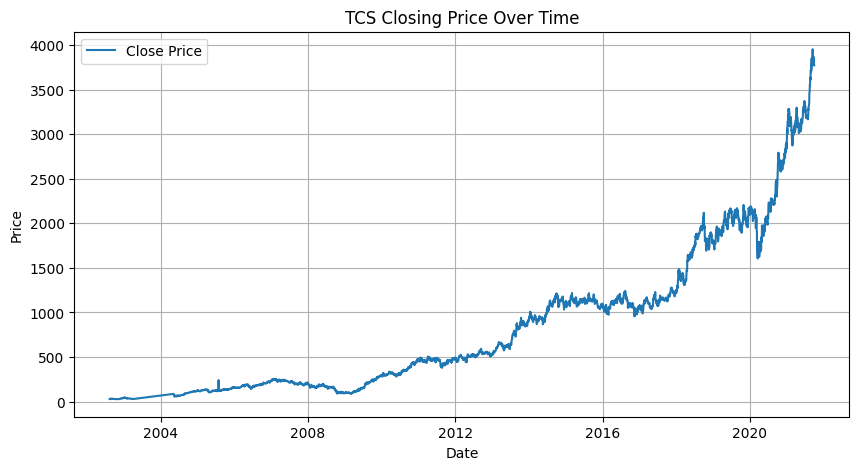

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(stock_history['Date'], stock_history['Close'], label='Close Price')
plt.title("TCS Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.legend()
plt.show()


### Volume Over Time

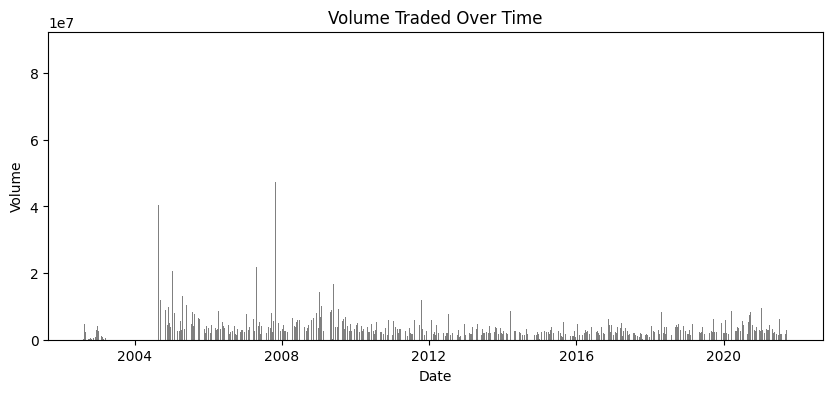

In [ ]:
plt.figure(figsize=(12,4))
plt.bar(stock_history['Date'], stock_history['Volume'], color='gray')
plt.title("Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


### 3. Daily Returns


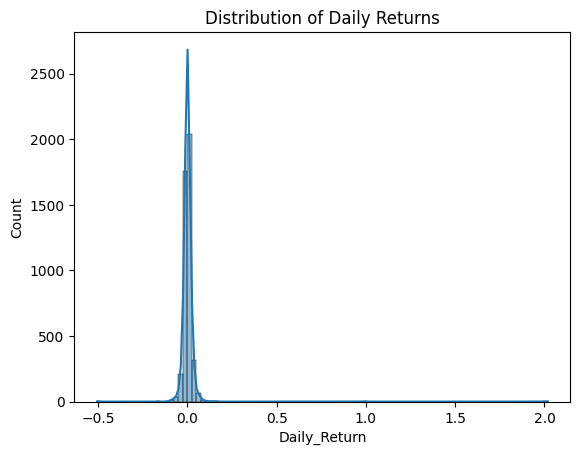

In [ ]:
stock_history['Daily_Return'] = stock_history['Close'].pct_change()
sns.histplot(stock_history['Daily_Return'].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()


## Feature Engineering

In [ ]:
# Moving averages
stock_history['MA20'] = stock_history['Close'].rolling(window=20).mean()
stock_history['MA50'] = stock_history['Close'].rolling(window=50).mean()

# Lag features
stock_history['Close_Lag1'] = stock_history['Close'].shift(1)
stock_history['Close_Lag5'] = stock_history['Close'].shift(5)

# Drop NA values created from shifting
stock_history.dropna(inplace=True)


## Model Building and Prediction

In [ ]:
features = ['Close_Lag1', 'Close_Lag5', 'MA20', 'MA50']
X = stock_history[features]
y = stock_history['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


## Visualize Model Performance

### 1. Line Plot: Actual vs Predicted

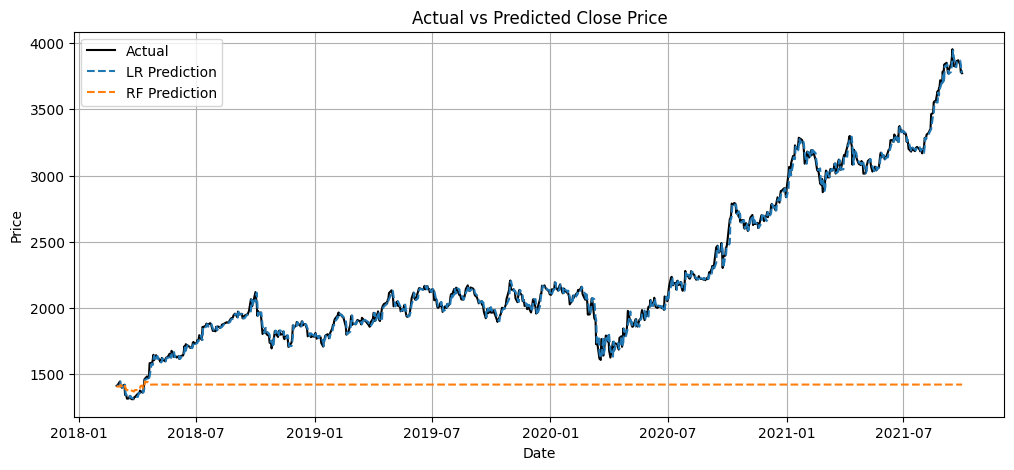

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(stock_history['Date'].iloc[-len(y_test):], y_test, label='Actual', color='black')
plt.plot(stock_history['Date'].iloc[-len(y_test):], y_pred_lr, label='LR Prediction', linestyle='--')
plt.plot(stock_history['Date'].iloc[-len(y_test):], y_pred_rf, label='RF Prediction', linestyle='--')
plt.title("Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


## 2. Model Performance Metrics

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"📊 {model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R²: {r2_score(y_true, y_pred):.4f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


📊 Linear Regression Performance:
MAE: 26.3964
RMSE: 37.0022
R²: 0.9961

📊 Random Forest Regressor Performance:
MAE: 848.3029
RMSE: 1032.0684
R²: -2.0386



## 🔮 1. Next-Day Close Price Prediction (Linear Regression)

In [ ]:

features = ['Close_Lag1', 'Close_Lag5', 'MA20', 'MA50']
X = stock_history[features]
y = stock_history['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_model(y_test, y_pred, "Linear Regression")


📊 Linear Regression Performance:
MAE: 26.3964
RMSE: 37.0022
R²: 0.9961



## 📈 2. Trend Classification: Up/Down Movement (Random Forest)

Accuracy: 0.4665911664779162


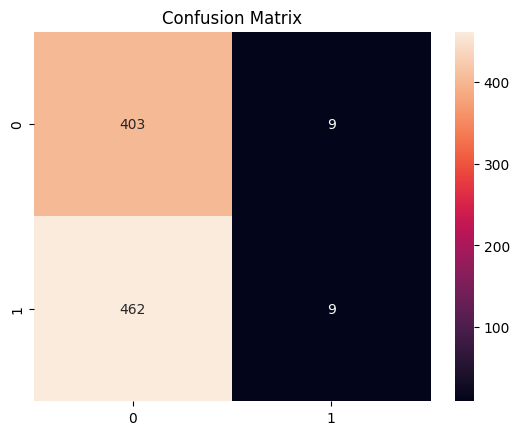

In [ ]:

stock_history['Target'] = (stock_history['Close'].shift(-1) > stock_history['Close']).astype(int)
X = stock_history[features]
y = stock_history['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


## 📉 3. Volatility Forecasting (Classification)

In [ ]:

stock_history['Volatility'] = stock_history['Close'].rolling(window=10).std()
stock_history['High_Volatility'] = (stock_history['Volatility'] > stock_history['Volatility'].quantile(0.75)).astype(int)
X = stock_history[features]
y = stock_history['High_Volatility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Volatility Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Volatility Accuracy: 0.20498301245753114


## 📊 4. 3-Day Ahead Close Price Forecast

In [ ]:

stock_history['Close_3D_Future'] = stock_history['Close'].shift(-3)
stock_history.dropna(inplace=True)

X = stock_history[features]
y = stock_history['Close_3D_Future']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred, "3-Day Forecast")


📊 3-Day Forecast Performance:
MAE: 868.8312
RMSE: 1048.5687
R²: -2.1443



## 🧠 5. Time Series Forecasting with ARIMA

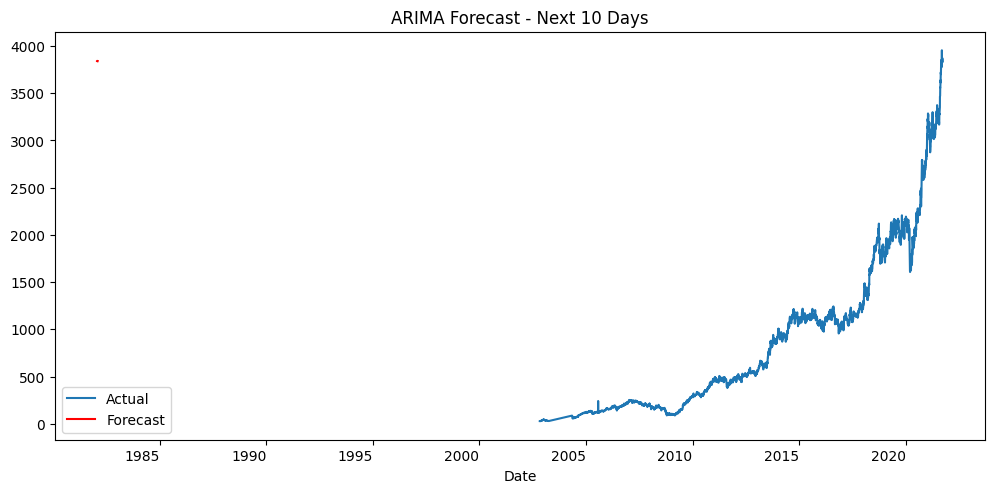

In [ ]:

ts = stock_history.set_index('Date')['Close']
model = ARIMA(ts, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)

ts.plot(label='Actual', figsize=(12,6))
forecast.plot(label='Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast - Next 10 Days")
plt.show()
